In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix 
from sklearn.model_selection import cross_val_score


sns.set(style = "darkgrid")

#sns.set(style="whitegrid", font_scale=1.5, palette="coolwarm", font="arial")

In [233]:
df = pd.read_csv('hotel_bookings.csv')









# EDA

In [234]:
df = df.drop(columns = ['lead_time', 'arrival_date_week_number', 'meal', 'distribution_channel', 'required_car_parking_spaces', 'total_of_special_requests', 'agent', 'company'])

In [235]:
df

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,1,0,0,2,0.0,0,...,0,C,C,3,No Deposit,0,Transient,0.00,Check-Out,7/1/2015
1,Resort Hotel,0,2015,July,1,0,0,2,0.0,0,...,0,C,C,4,No Deposit,0,Transient,0.00,Check-Out,7/1/2015
2,Resort Hotel,0,2015,July,1,0,1,1,0.0,0,...,0,A,C,0,No Deposit,0,Transient,75.00,Check-Out,7/2/2015
3,Resort Hotel,0,2015,July,1,0,1,1,0.0,0,...,0,A,A,0,No Deposit,0,Transient,75.00,Check-Out,7/2/2015
4,Resort Hotel,0,2015,July,1,0,2,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,98.00,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,30,2,5,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,96.14,Check-Out,9/6/2017
119386,City Hotel,0,2017,August,31,2,5,3,0.0,0,...,0,E,E,0,No Deposit,0,Transient,225.43,Check-Out,9/7/2017
119387,City Hotel,0,2017,August,31,2,5,2,0.0,0,...,0,D,D,0,No Deposit,0,Transient,157.71,Check-Out,9/7/2017
119388,City Hotel,0,2017,August,31,2,5,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,104.40,Check-Out,9/7/2017


In [236]:
df.isnull().sum()

hotel                               0
is_canceled                         0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
country                           488
market_segment                      0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
reservation_status                  0
reservation_status_date             0
dtype: int64

In [237]:
df = df.dropna(axis = 0)

In [238]:
df.isnull().sum()

hotel                             0
is_canceled                       0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
reservation_status_date           0
dtype: int64

In [239]:
df.duplicated().sum()

33884

In [240]:
df = df.drop_duplicates()

In [241]:
df.size

2040336

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85014 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85014 non-null  object 
 1   is_canceled                     85014 non-null  int64  
 2   arrival_date_year               85014 non-null  int64  
 3   arrival_date_month              85014 non-null  object 
 4   arrival_date_day_of_month       85014 non-null  int64  
 5   stays_in_weekend_nights         85014 non-null  int64  
 6   stays_in_week_nights            85014 non-null  int64  
 7   adults                          85014 non-null  int64  
 8   children                        85014 non-null  float64
 9   babies                          85014 non-null  int64  
 10  country                         85014 non-null  object 
 11  market_segment                  85014 non-null  object 
 12  is_repeated_guest              

In [243]:
df.shape

(85014, 24)

In [244]:
df.describe()

,is_canceled,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000
mean,0.279777,2016.213530,15.812290,1.010892,2.636954,1.880196,0.141777,0.011057,0.039829,0.030771,0.180441,0.275119,0.755276,107.034252
std,0.448892,0.685674,8.833972,1.030808,2.049334,0.629039,0.460606,0.114760,0.195558,0.373500,1.736890,0.733094,10.057824,55.192780
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.750000
50%,0.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000
75%,1.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000
max,1.000000,2017.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000


In [245]:
df["days_in_waiting_list"].describe()

count    85014.000000
mean         0.755276
std         10.057824
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

In [246]:
df["arrival_date_month"].describe()

#unique 12 means (12 months) which they are all unique

count      85014
unique        12
top       August
freq       11080
Name: arrival_date_month, dtype: object

In [247]:
df.sample()


# is_canceled column: “0” means not canceled and “1”  means is canceled reservation

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,reservation_status_date
37343,Resort Hotel,0,2017,June,14,0,1,2,0.0,0,...,0,D,D,0,No Deposit,0,Transient,155.0,Check-Out,6/15/2017


In [248]:
df.describe(include='all')

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,reservation_status_date
count,85014,85014.000000,85014.000000,85014,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,85014.000000,...,85014.000000,85014,85014,85014.000000,85014,85014.000000,85014,85014.000000,85014,85014
unique,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10,12,NaN,3,NaN,4,NaN,3,926
top,City Hotel,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,Check-Out,5/25/2017
freq,52226,NaN,NaN,11080,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54649,44900,NaN,83897,NaN,70335,NaN,61229,199
mean,NaN,0.279777,2016.213530,NaN,15.812290,1.010892,2.636954,1.880196,0.141777,0.011057,...,0.180441,NaN,NaN,0.275119,NaN,0.755276,NaN,107.034252,NaN,NaN
std,NaN,0.448892,0.685674,NaN,8.833972,1.030808,2.049334,0.629039,0.460606,0.114760,...,1.736890,NaN,NaN,0.733094,NaN,10.057824,NaN,55.192780,NaN,NaN
min,NaN,0.000000,2015.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,NaN,NaN
25%,NaN,0.000000,2016.000000,NaN,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,72.750000,NaN,NaN
50%,NaN,0.000000,2016.000000,NaN,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,99.000000,NaN,NaN
75%,NaN,1.000000,2017.000000,NaN,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,135.000000,NaN,NaN


In [249]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [250]:
 df['reservation_status'].unique()


array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [251]:
# Shows the price rates for the resort hotel for each month

Price_rate=df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)].groupby(['arrival_date_month'])['adr'].mean()

Price_rate

arrival_date_month
April         77.374498
August       182.731752
December      64.355469
February      54.083299
January       48.853694
July         151.623757
June         110.025411
March         57.639846
May           78.290567
November      49.346769
October       63.177244
September     99.059033
Name: adr, dtype: float64

In [252]:
# Shows the price rates for the city hotel for each month

Price_rate=df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)].groupby(['arrival_date_month'])['adr'].mean()

Price_rate

arrival_date_month
April        114.355660
August       122.770907
December      90.748453
February      88.115041
January       83.378576
July         120.086571
June         120.711167
March         90.921353
May          124.890310
November      88.262833
October      105.701722
September    117.023942
Name: adr, dtype: float64

# Visualization

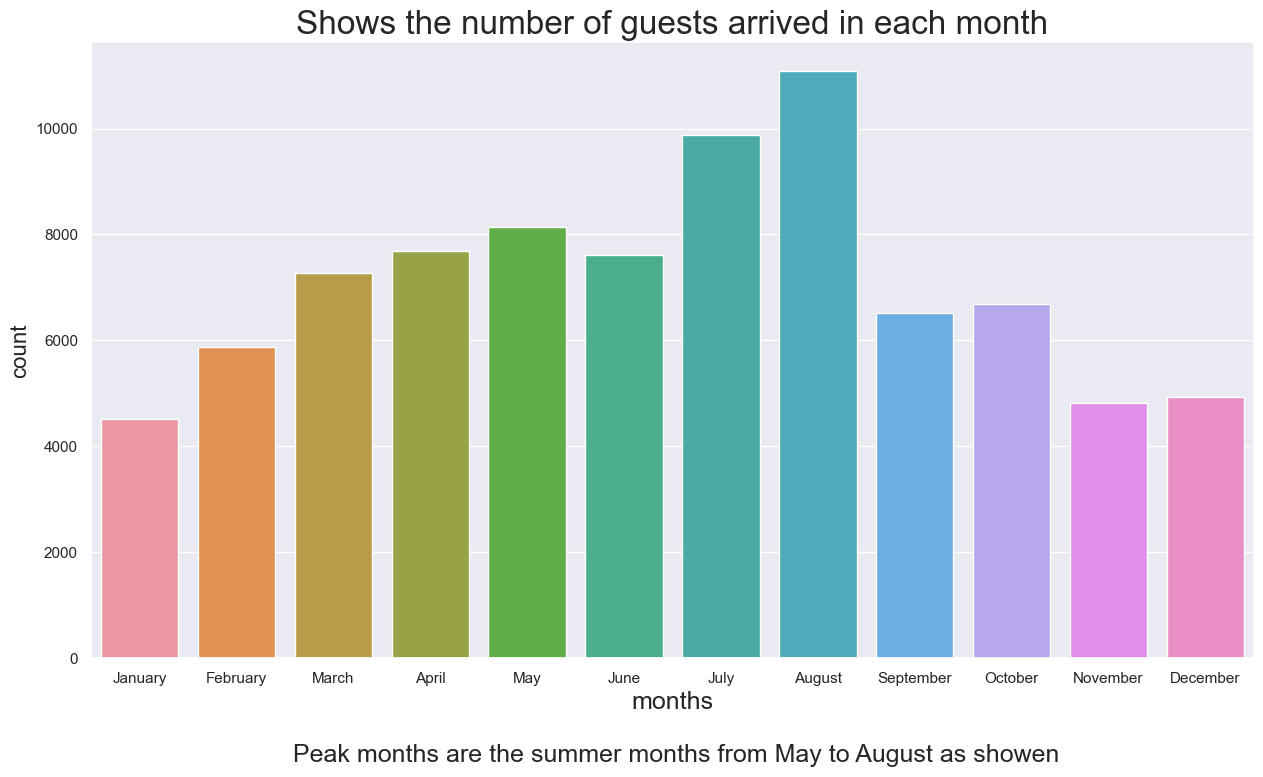

In [253]:
plt.figure(figsize=(15,8))

monthsOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

sns.countplot(df['arrival_date_month'],order = monthsOrder)

plt.title("Shows the number of guests arrived in each month", fontsize=24);

plt.xlabel('months\n\n Peak months are the summer months from May to August as showen', fontsize=18)
plt.ylabel('count', fontsize=16);

#Peak months are the summer months May to August as showen


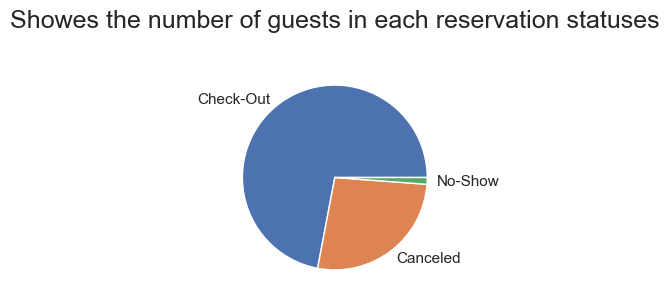

In [254]:
plt.figure(figsize=(15,3))

plt.title("Showes the number of guests in each reservation statuses\n", fontsize=18);


plt.pie(df['reservation_status'].value_counts().tolist(), labels=df['reservation_status'].value_counts().index.tolist());




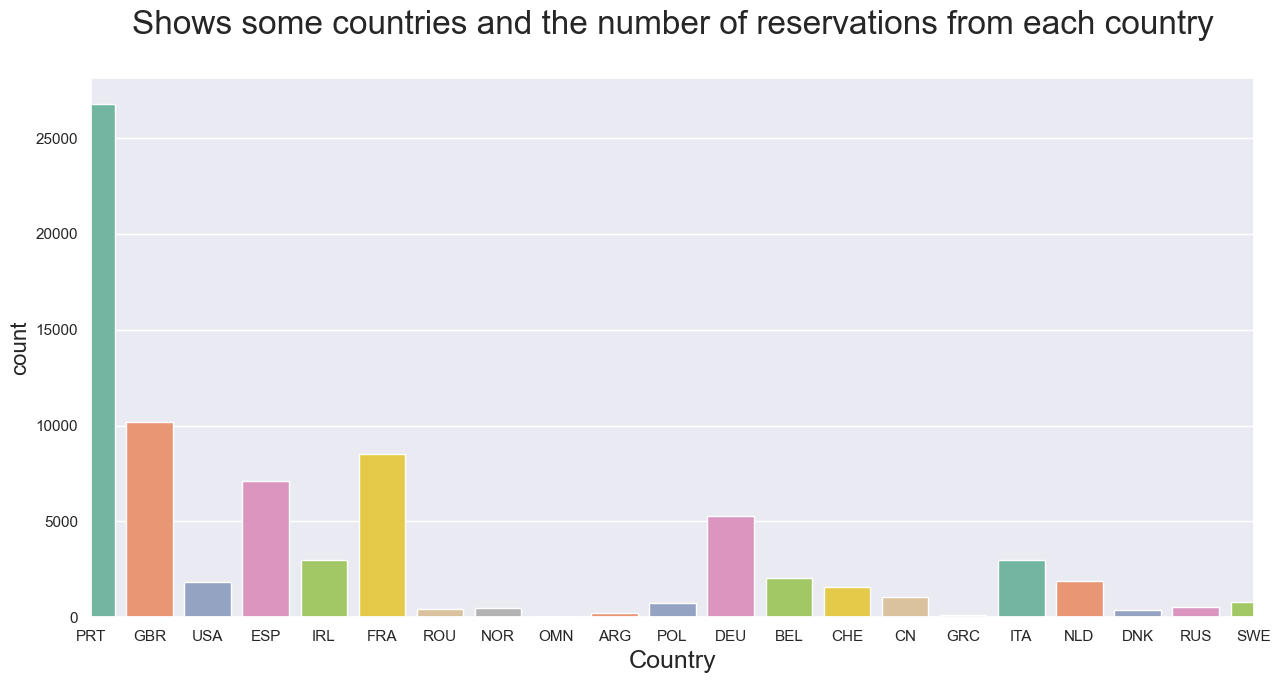

In [255]:

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='country', palette="Set2").set_xlim(0, 20)
plt.title("Shows some countries and the number of reservations from each country\n", fontsize=24);

plt.xlabel('Country', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.show()

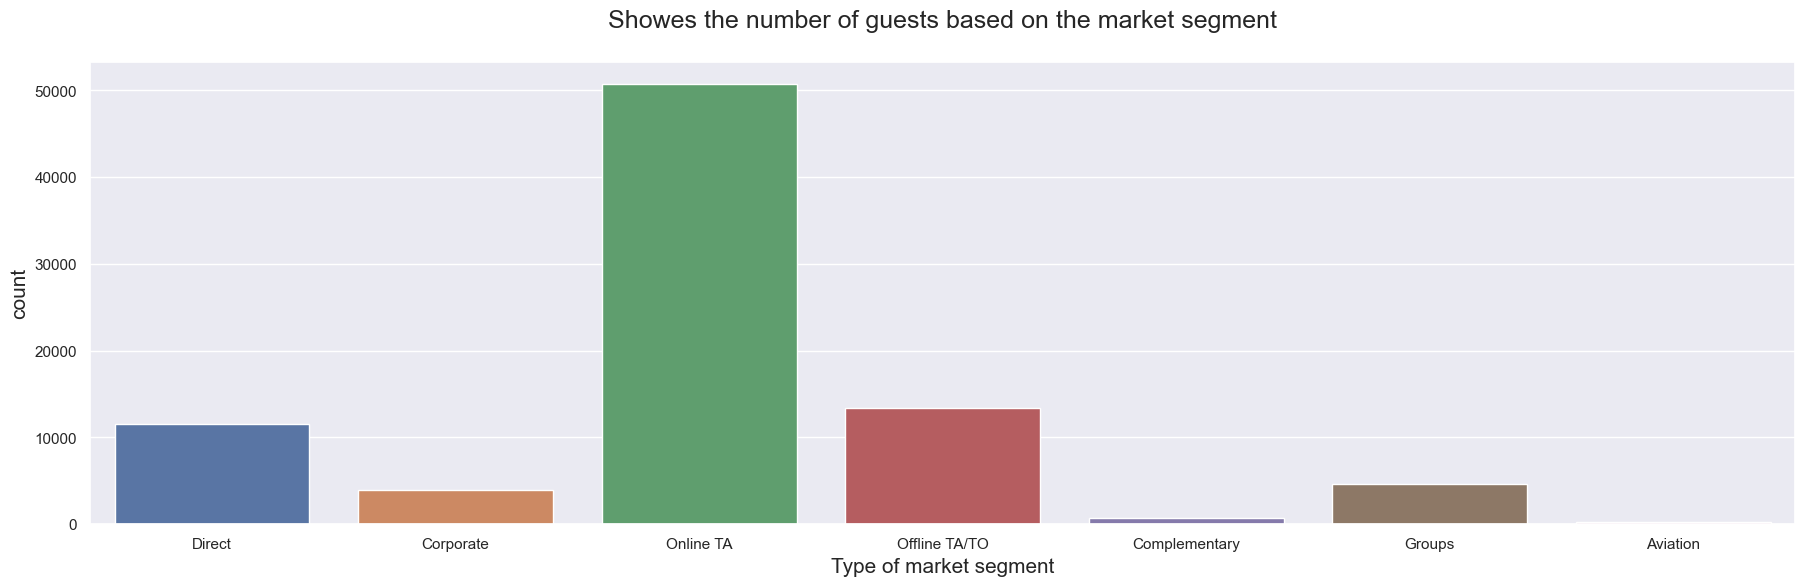

In [256]:
plt.figure(figsize=(22,6))
sns.countplot(data = df, x = 'market_segment');

plt.title("Showes the number of guests based on the market segment\n", fontsize=18);

plt.xlabel('Type of market segment', fontsize=15)
plt.ylabel('count', fontsize=15);

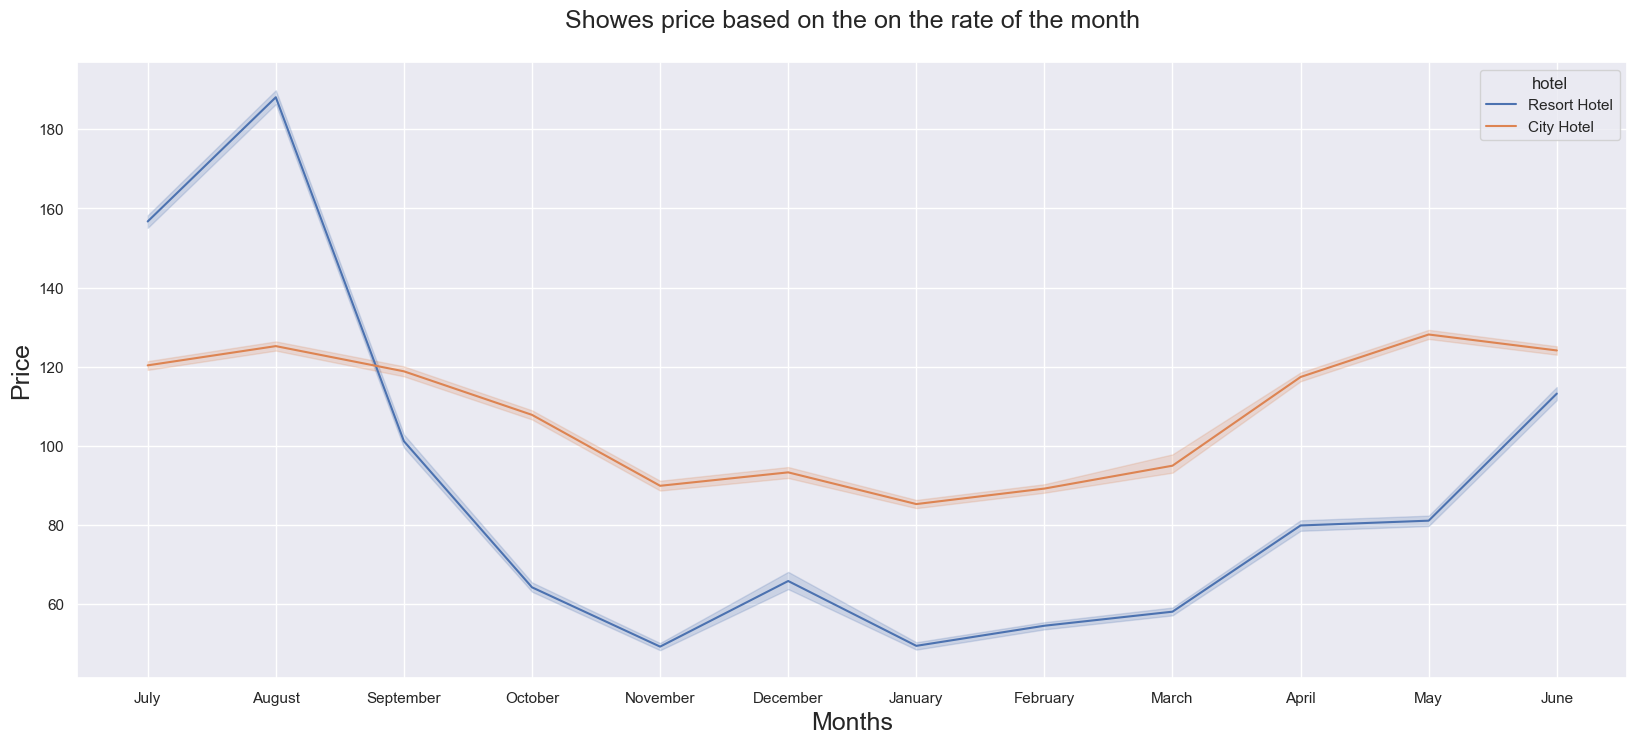

In [257]:
plt.figure(figsize=(20,8))
#monthsOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

sns.lineplot(data = df, x ='arrival_date_month', y = 'adr', hue = 'hotel')

plt.title("Showes price based on the on the rate of the month\n", fontsize=18);

plt.xlabel('Months', fontsize=18)
plt.ylabel('Price', fontsize=18);


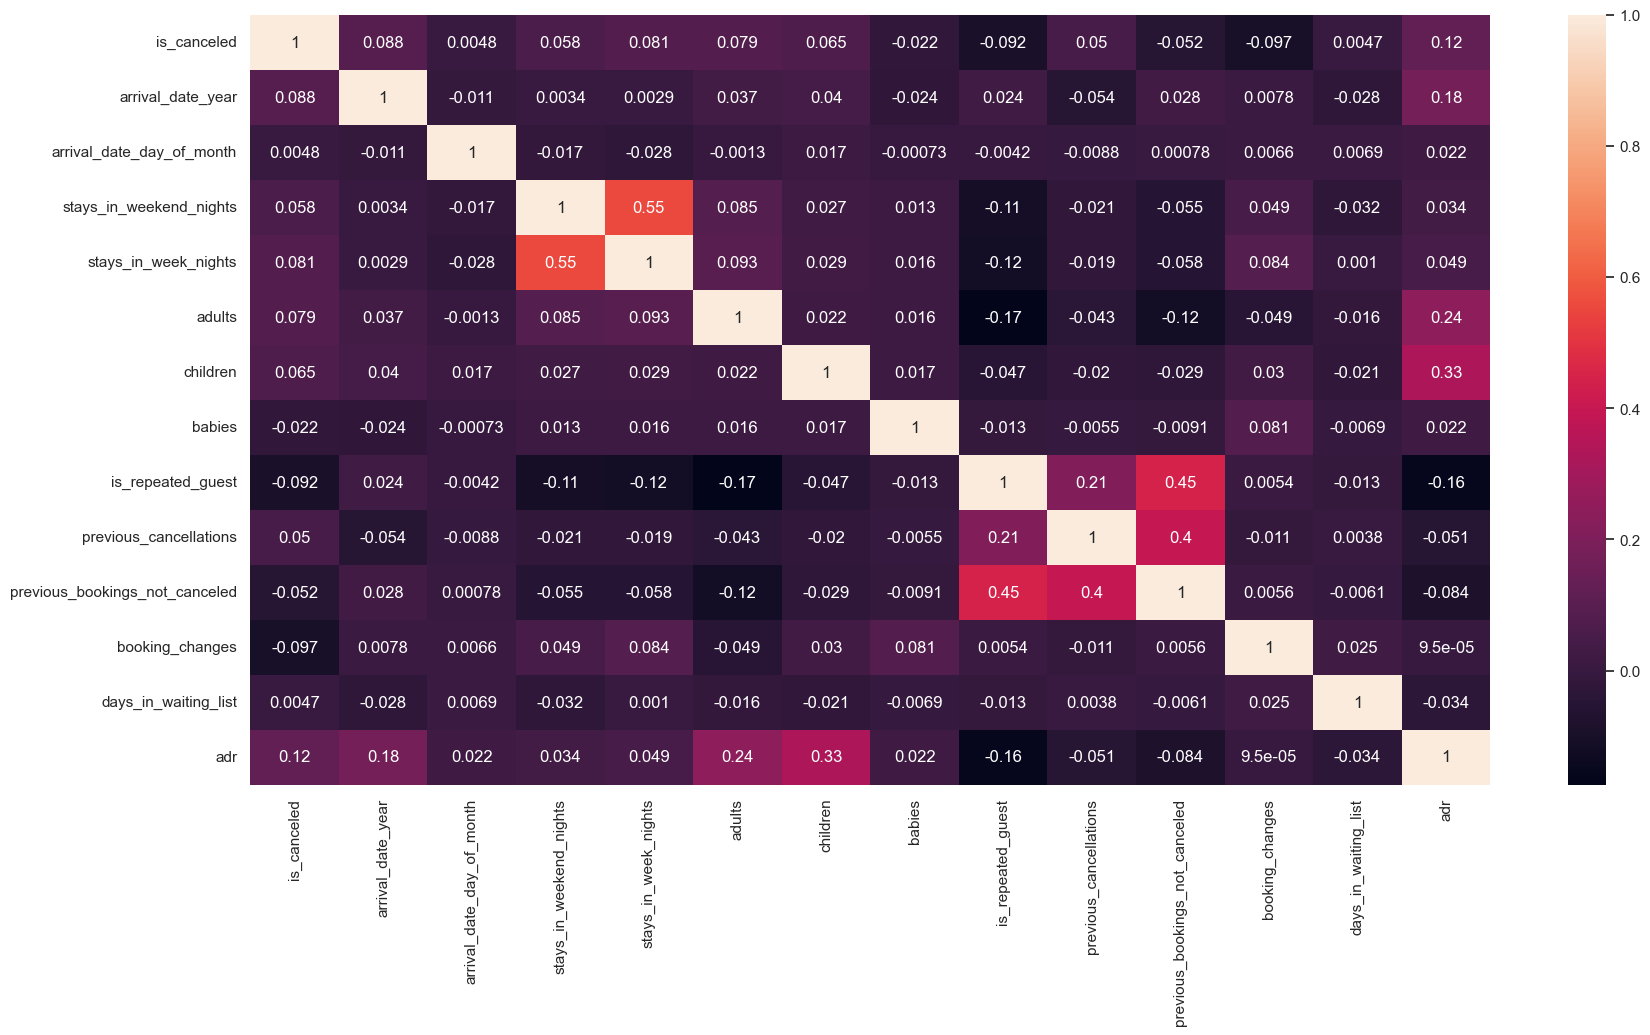

In [258]:

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linecolor='b');


# pre_processing







In [259]:
# Before the conversion look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85014 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85014 non-null  object 
 1   is_canceled                     85014 non-null  int64  
 2   arrival_date_year               85014 non-null  int64  
 3   arrival_date_month              85014 non-null  object 
 4   arrival_date_day_of_month       85014 non-null  int64  
 5   stays_in_weekend_nights         85014 non-null  int64  
 6   stays_in_week_nights            85014 non-null  int64  
 7   adults                          85014 non-null  int64  
 8   children                        85014 non-null  float64
 9   babies                          85014 non-null  int64  
 10  country                         85014 non-null  object 
 11  market_segment                  85014 non-null  object 
 12  is_repeated_guest              

In [260]:
#Data Processing 
#converting all the dtypes[object] to numerical
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,hotel,arrival_date_month,country,market_segment,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,PRT,Direct,C,C,No Deposit,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,PRT,Direct,C,C,No Deposit,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,GBR,Direct,A,C,No Deposit,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,GBR,Corporate,A,A,No Deposit,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,GBR,Online TA,A,A,No Deposit,Transient,Check-Out,7/3/2015


In [261]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)

In [262]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)

In [263]:
#Converting from float to int (adr & children)


df = df.astype({'adr':'int'})

df = df.astype({'children':'int'})

print(df.dtypes)

is_canceled                       int64
arrival_date_year                 int64
arrival_date_day_of_month         int64
stays_in_weekend_nights           int64
stays_in_week_nights              int64
adults                            int64
children                          int64
babies                            int64
is_repeated_guest                 int64
previous_cancellations            int64
previous_bookings_not_canceled    int64
booking_changes                   int64
days_in_waiting_list              int64
adr                               int64
hotel                             int64
arrival_date_month                int64
country                           int64
market_segment                    int64
reserved_room_type                int64
assigned_room_type                int64
deposit_type                      int64
customer_type                     int64
reservation_status                int64
reservation_status_date           int64
dtype: object


In [264]:
# After the conversion look at column types
#df.info()

# ML#







In [265]:

X = df.drop('is_canceled',axis=1)
y = df['is_canceled']


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [266]:

# *** Logistic Regression ***

#Builting
lr = LogisticRegression()

#Training the Model

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)




In [267]:
comp_result = pd.DataFrame(y_test)
comp_result['Predicted: y_pred_lr']= y_pred_lr
comp_result

,is_canceled,Predicted: y_pred_lr
108003,0,0
37875,0,0
20840,0,0
7364,1,1
105100,0,0
...,...,...
19967,0,0
83524,0,0
51179,1,0
78099,0,1


In [268]:
model_lr= accuracy_score(y_test, y_pred_lr)


model_lr

0.8519898059204077

In [269]:
print( confusion_matrix(y_test, y_pred_lr))


[[16855  1517]
 [ 2258  4875]]


In [272]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18372
           1       0.76      0.68      0.72      7133

    accuracy                           0.85     25505
   macro avg       0.82      0.80      0.81     25505
weighted avg       0.85      0.85      0.85     25505



In [273]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 0.14801019407959223
MSE: 0.14801019407959223
RMSE: 0.38472093012935005


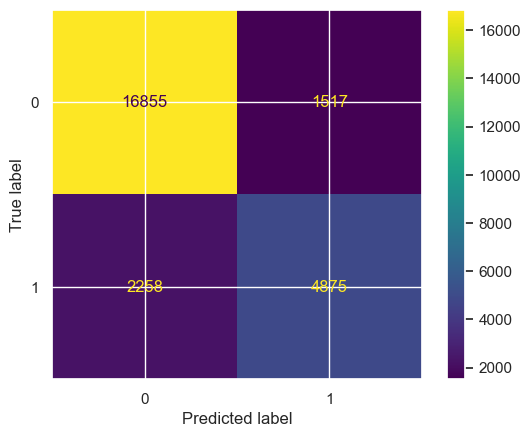

In [274]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

In [275]:
# *** K Nearest Neighbors ***


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [276]:
pred = knn.predict(X_test)


In [277]:
comp_result = pd.DataFrame(y_test)
comp_result['predicted']= pred
comp_result

,is_canceled,predicted
108003,0,0
37875,0,0
20840,0,0
7364,1,1
105100,0,0
...,...,...
19967,0,0
83524,0,0
51179,1,0
78099,0,0


In [278]:
model_knn = accuracy_score(y_test, pred)

model_knn

0.8369339345226426

In [279]:
print(confusion_matrix(y_test,pred))


[[17579   793]
 [ 3366  3767]]


In [280]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     18372
           1       0.83      0.53      0.64      7133

    accuracy                           0.84     25505
   macro avg       0.83      0.74      0.77     25505
weighted avg       0.84      0.84      0.82     25505



In [281]:
#print('MAE:', metrics.mean_absolute_error(y_test, pred))
#print('MSE:', metrics.mean_squared_error(y_test, pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

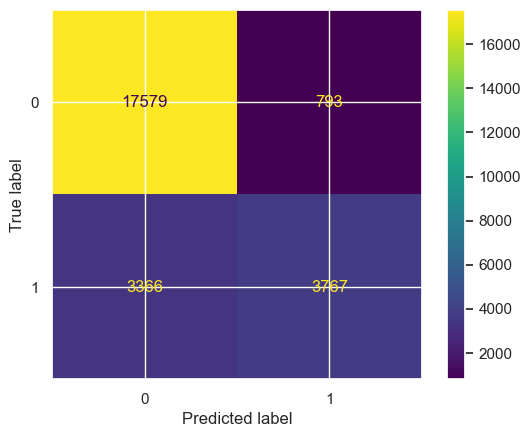

In [282]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [283]:
# *** DecisionTreeClassifier ***

dd = DecisionTreeClassifier()
dd.fit(X_train, y_train)
y_pred_dd = dd.predict(X_test)






In [284]:
comp_result = pd.DataFrame(y_test)
comp_result['Predicted: y_pred_dd']= y_pred_dd
comp_result

,is_canceled,Predicted: y_pred_dd
108003,0,0
37875,0,0
20840,0,0
7364,1,1
105100,0,0
...,...,...
19967,0,0
83524,0,0
51179,1,1
78099,0,0


In [285]:
model_dt = accuracy_score(y_test,y_pred_dd)

model_dt

1.0

In [286]:
print(confusion_matrix(y_test,y_pred_dd))


[[18372     0]
 [    0  7133]]


In [287]:
print(classification_report(y_test, y_pred_dd))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18372
           1       1.00      1.00      1.00      7133

    accuracy                           1.00     25505
   macro avg       1.00      1.00      1.00     25505
weighted avg       1.00      1.00      1.00     25505



In [288]:
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dd))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred_dd))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dd)))

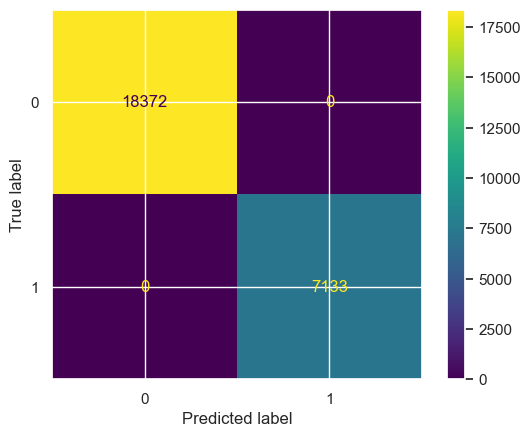

In [289]:
plot_confusion_matrix(dd, X_test, y_test)  
plt.show()

In [290]:
print('Logistic Regression module: ', model_lr) 
print('K Nearest Neighbors module: ', model_knn)
print('DecisionTreeClassifier module: ', model_dt)

Logistic Regression module:  0.8519898059204077
K Nearest Neighbors module:  0.8369339345226426
DecisionTreeClassifier module:  1.0


In [291]:
#Cross validation Split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [292]:
clf = lr.fit(X_train,y_train)
scores = cross_val_score(clf, X, y, cv=5)
scores

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("The logistic Regression  Accuracy: {:.1f} %".format(scores.mean()*100))

0.84 accuracy with a standard deviation of 0.05
The logistic Regression  Accuracy: 83.7 %


In [293]:
clf = knn.fit(X_train,y_train)
scores = cross_val_score(clf, X, y, cv=5)
scores

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("The K Nearest Neighbors Accuracy: {:.1f} %".format(scores.mean()*100))

0.79 accuracy with a standard deviation of 0.02
The K Nearest Neighbors Accuracy: 78.9 %


In [294]:
clf = dd.fit(X_train,y_train)
scores = cross_val_score(clf, X, y, cv=5)
scores

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("The Decision Tree Accuracy: {:.1f} %".format(scores.mean()*100))

1.00 accuracy with a standard deviation of 0.00
The Decision Tree Accuracy: 100.0 %
